/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


            new_cases  new_cases_smoothed
Date                                     
2020-07-01      51820           43989.714
2020-07-02      56636           46319.714
2020-07-03      51351           47084.286
2020-07-04      45693           47707.571
2020-07-05      50747           49138.000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           335 non-null    int64  
 1   new_cases_smoothed  335 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


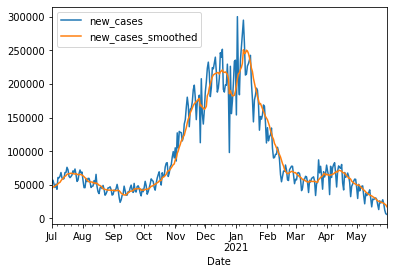

In [ ]:
#read csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('202'+x, '%Y-%m-%d')
 
series = read_csv('https://raw.githubusercontent.com/ll-cooool-j/DS-Assignment/main/Datasets/Datasets%20for%20ARIMA%20(Only%20Date%20%2B%20Confirmed)/United%20States%20(Date%20%2B%20New%20Cases%20%2B%20Smoothed%20New%20Cases).csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
print(series.info())
series.plot()
pyplot.show()

#we only use the raw data so we drop the smoothed data attribute out
series = series.drop(columns =['new_cases_smoothed'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Observations: 115
Training Observations: 60
Testing Observations: 55
Observations: 170
Training Observations: 115
Testing Observations: 55
Observations: 225
Training Observations: 170
Testing Observations: 55
Observations: 280
Training Observations: 225
Testing Observations: 55
Observations: 335
Training Observations: 280
Testing Observations: 55


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe

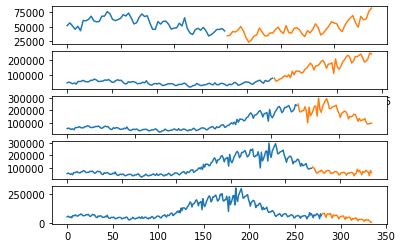

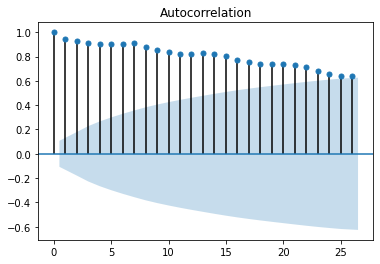

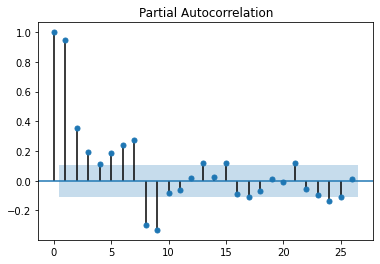

In [ ]:
#Implementation of rolling-forward validation train-test split
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
X = series.values
splits = TimeSeriesSplit(n_splits=5)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(510 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
pyplot.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
pyplot.show()

In [ ]:
#split dataset into two subsets and calculate the mean
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=84493.613095, mean2=98385.820359


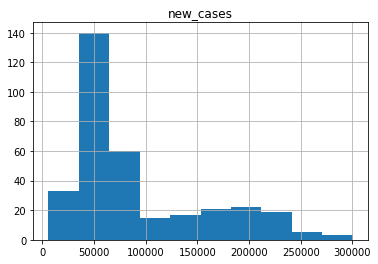

In [ ]:
#check distribution of raw data set
series.hist()
pyplot.show()

In [ ]:
#define function for ADF test (check stationarity)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(series['new_cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.116024
p-value                          0.708640
#Lags Used                      16.000000
Number of Observations Used    318.000000
Critical Value (1%)             -3.451082
Critical Value (5%)             -2.870672
Critical Value (10%)            -2.571636
dtype: float64


[-0.02147327]


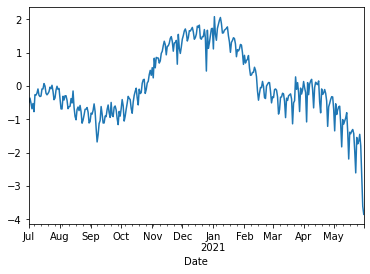

In [ ]:
#Power transformation to achieve stationarity as far as possible
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(series)
print(pt.lambdas_)
series['y'] = pt.transform(series)
series['y'].plot()


In [ ]:
#make sure to drop NaN or inf values
series = series.drop(columns = ['new_cases'])
series.dropna(inplace=True)
print(series.head())
print(series.info())

                   y
Date                
2020-07-01 -0.497041
2020-07-02 -0.364667
2020-07-03 -0.510598
2020-07-04 -0.684904
2020-07-05 -0.528244
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 335 entries, 2020-07-01 to 2021-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       335 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB
None


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:60], X[60:115] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


ARIMA(0, 0, 0) RMSE=0.420
ARIMA(0, 0, 1) RMSE=0.288
ARIMA(0, 1, 0) RMSE=0.247
ARIMA(0, 1, 1) RMSE=0.250
ARIMA(0, 1, 2) RMSE=0.227
ARIMA(0, 1, 3) RMSE=0.230
ARIMA(0, 2, 0) RMSE=0.339
ARIMA(0, 2, 1) RMSE=0.251
ARIMA(0, 2, 2) RMSE=0.254
ARIMA(1, 0, 0) RMSE=0.240
ARIMA(1, 0, 1) RMSE=0.239
ARIMA(1, 0, 2) RMSE=0.233
ARIMA(1, 0, 3) RMSE=0.229
ARIMA(1, 1, 0) RMSE=0.249
ARIMA(1, 2, 0) RMSE=0.329
ARIMA(2, 0, 0) RMSE=0.240
ARIMA(2, 1, 0) RMSE=0.241
ARIMA(2, 1, 3) RMSE=0.205
ARIMA(2, 2, 0) RMSE=0.302
Best ARIMA(2, 1, 3) RMSE=0.205


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -18.917
Method:                       css-mle   S.D. of innovations              0.246
Date:                Sat, 17 Jul 2021   AIC                             51.834
Time:                        03:05:43   BIC                             78.512
Sample:                    07-02-2020   HQIC                            62.471
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -29.659      0.000      -0.008      -0.007
ar.L1.D.y      1.2458      0.003    413.260      0.000       1.240       1.252
ar.L2.D.y     -1.0000        nan        nan        n

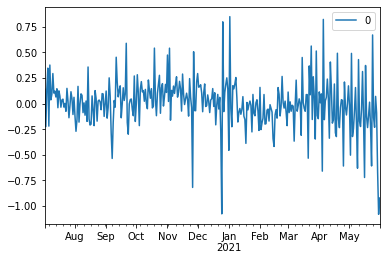

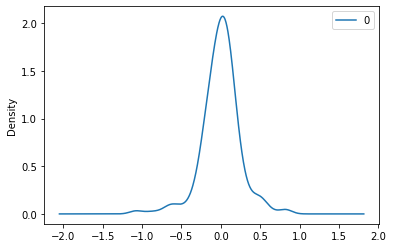

                0
count  334.000000
mean     0.000380
std      0.247720
min     -1.082662
25%     -0.118850
50%      0.009901
75%      0.122270
max      0.849761
predicted=-0.954132, expected=-1.110435
predicted=-1.070673, expected=-1.069137
predicted=-0.976976, expected=-0.816511
predicted=-0.713191, expected=-0.846452
predicted=-0.680342, expected=-0.732860
predicted=-0.759528, expected=-0.539013
predicted=-0.793296, expected=-0.770286
predicted=-0.929557, expected=-1.256755
predicted=-1.157098, expected=-1.678839
predicted=-1.371166, expected=-1.463284
predicted=-1.194425, expected=-1.126038
predicted=-0.913544, expected=-1.039927
predicted=-0.939933, expected=-0.618510
predicted=-0.896452, expected=-0.843423
predicted=-1.079584, expected=-1.111835
predicted=-1.303394, expected=-1.109605
predicted=-1.228554, expected=-0.903286
predicted=-0.885349, expected=-0.920935
predicted=-0.685114, expected=-0.703441
predicted=-0.617255, expected=-0.571953
predicted=-0.692845, expected=-0.80382

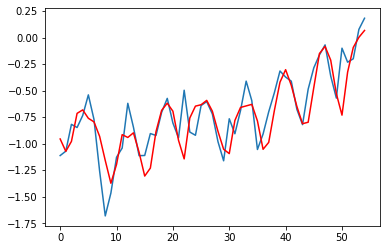

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (60 training observations and 55 testing observations)
train, test = X[:60], X[60:115] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:115], X[115:170] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=1.450
ARIMA(0, 0, 1) RMSE=0.870
ARIMA(0, 1, 0) RMSE=0.248
ARIMA(0, 1, 1) RMSE=0.238
ARIMA(0, 1, 2) RMSE=0.239
ARIMA(0, 1, 3) RMSE=0.239
ARIMA(0, 2, 0) RMSE=0.421
ARIMA(0, 2, 1) RMSE=0.250
ARIMA(1, 0, 0) RMSE=0.269
ARIMA(1, 0, 1) RMSE=0.266
ARIMA(1, 1, 0) RMSE=0.242
ARIMA(1, 1, 1) RMSE=0.229
ARIMA(1, 1, 2) RMSE=0.240
ARIMA(1, 1, 3) RMSE=0.244
ARIMA(1, 2, 0) RMSE=0.326
ARIMA(2, 0, 0) RMSE=0.267
ARIMA(2, 0, 1) RMSE=0.244
ARIMA(2, 0, 2) RMSE=0.251
ARIMA(2, 0, 3) RMSE=0.258
ARIMA(2, 1, 0) RMSE=0.247
ARIMA(2, 1, 1) RMSE=0.243
ARIMA(2, 1, 2) RMSE=0.229
ARIMA(2, 1, 3) RMSE=0.205
ARIMA(2, 2, 0) RMSE=0.317
Best ARIMA(2, 1, 3) RMSE=0.205


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -18.917
Method:                       css-mle   S.D. of innovations              0.246
Date:                Sat, 17 Jul 2021   AIC                             51.834
Time:                        03:06:57   BIC                             78.512
Sample:                    07-02-2020   HQIC                            62.471
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -29.659      0.000      -0.008      -0.007
ar.L1.D.y      1.2458      0.003    413.260      0.000       1.240       1.252
ar.L2.D.y     -1.0000        nan        nan        n

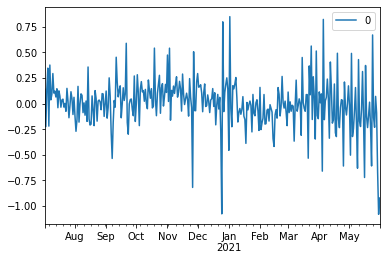

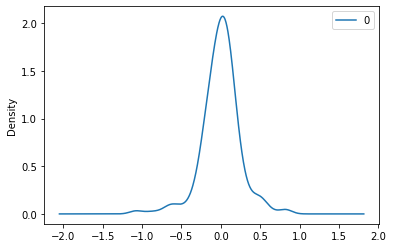

                0
count  334.000000
mean     0.000380
std      0.247720
min     -1.082662
25%     -0.118850
50%      0.009901
75%      0.122270
max      0.849761
predicted=0.015999, expected=0.197612
predicted=-0.063830, expected=-0.225259
predicted=-0.246915, expected=-0.108197
predicted=-0.143202, expected=0.087809
predicted=0.148473, expected=0.136766
predicted=0.305044, expected=0.337752
predicted=0.354680, expected=0.465368
predicted=0.304680, expected=0.317133
predicted=0.141490, expected=0.546518
predicted=0.233573, expected=0.240554
predicted=0.284999, expected=0.828981
predicted=0.742257, expected=0.541483
predicted=0.803966, expected=0.853705
predicted=0.848849, expected=0.838550
predicted=0.742973, expected=0.832564
predicted=0.627487, expected=0.683547
predicted=0.567944, expected=0.749019
predicted=0.720250, expected=0.974332
predicted=1.029243, expected=1.037778
predicted=1.184058, expected=1.206260
predicted=1.215058, expected=1.338100
predicted=1.174559, expected=1.2340

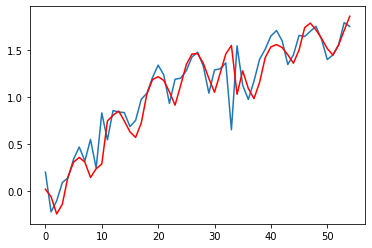

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (115 training observations and 55 testing observations)
train, test = X[:115], X[115:170] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:170], X[170:225] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.234
ARIMA(0, 0, 1) RMSE=0.754
ARIMA(0, 0, 2) RMSE=0.599
ARIMA(0, 0, 3) RMSE=0.561
ARIMA(0, 1, 0) RMSE=0.336
ARIMA(0, 1, 1) RMSE=0.304
ARIMA(0, 1, 2) RMSE=0.303
ARIMA(0, 1, 3) RMSE=0.308
ARIMA(0, 2, 0) RMSE=0.570
ARIMA(0, 2, 1) RMSE=0.339
ARIMA(1, 0, 0) RMSE=0.331
ARIMA(1, 0, 1) RMSE=0.301
ARIMA(1, 1, 0) RMSE=0.314
ARIMA(1, 1, 1) RMSE=0.302
ARIMA(1, 1, 2) RMSE=0.306
ARIMA(1, 1, 3) RMSE=0.310
ARIMA(1, 2, 0) RMSE=0.441
ARIMA(2, 0, 0) RMSE=0.311
ARIMA(2, 0, 2) RMSE=0.300
ARIMA(2, 1, 0) RMSE=0.311
ARIMA(2, 1, 1) RMSE=0.308
ARIMA(2, 1, 2) RMSE=0.300
ARIMA(2, 1, 3) RMSE=0.288
ARIMA(2, 2, 0) RMSE=0.391
Best ARIMA(2, 1, 3) RMSE=0.288


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -18.917
Method:                       css-mle   S.D. of innovations              0.246
Date:                Sat, 17 Jul 2021   AIC                             51.834
Time:                        03:08:14   BIC                             78.512
Sample:                    07-02-2020   HQIC                            62.471
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -29.659      0.000      -0.008      -0.007
ar.L1.D.y      1.2458      0.003    413.260      0.000       1.240       1.252
ar.L2.D.y     -1.0000        nan        nan        n

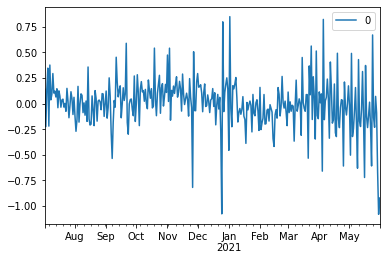

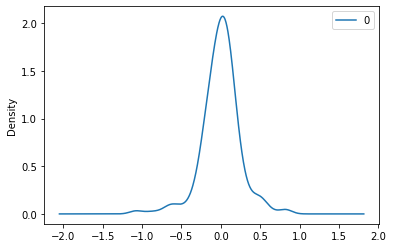

                0
count  334.000000
mean     0.000380
std      0.247720
min     -1.082662
25%     -0.118850
50%      0.009901
75%      0.122270
max      0.849761
predicted=1.770897, expected=1.820611
predicted=1.676940, expected=1.429286
predicted=1.442753, expected=1.398105
predicted=1.407723, expected=1.478243
predicted=1.562969, expected=1.473891
predicted=1.686758, expected=1.687427
predicted=1.790227, expected=1.444694
predicted=1.573440, expected=0.444721
predicted=0.836478, expected=1.667107
predicted=1.262646, expected=1.125395
predicted=1.257172, expected=1.286931
predicted=1.322875, expected=1.490618
predicted=1.454142, expected=1.712837
predicted=1.564975, expected=1.724519
predicted=1.594008, expected=1.107256
predicted=1.218083, expected=2.074590
predicted=1.648796, expected=1.550371
predicted=1.656004, expected=1.366831
predicted=1.583870, expected=1.721096
predicted=1.705082, expected=1.842221
predicted=1.776853, expected=1.964680
predicted=1.809461, expected=2.049495
pr

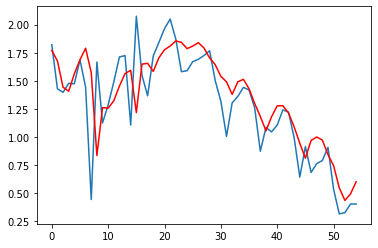

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (170 training observations and 55 testing observations)
train, test = X[0:170], X[170:225] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:225], X[225:280] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.576
ARIMA(0, 0, 1) RMSE=0.458
ARIMA(0, 0, 2) RMSE=0.386
ARIMA(0, 0, 3) RMSE=0.389
ARIMA(0, 1, 0) RMSE=0.361
ARIMA(0, 1, 1) RMSE=0.334
ARIMA(0, 1, 2) RMSE=0.325
ARIMA(0, 1, 3) RMSE=0.322
ARIMA(0, 2, 0) RMSE=0.583
ARIMA(0, 2, 1) RMSE=0.363
ARIMA(1, 0, 0) RMSE=0.354
ARIMA(1, 0, 1) RMSE=0.332
ARIMA(1, 0, 2) RMSE=0.323
ARIMA(1, 0, 3) RMSE=0.320
ARIMA(1, 1, 0) RMSE=0.345
ARIMA(1, 1, 1) RMSE=0.324
ARIMA(1, 1, 2) RMSE=0.324
ARIMA(1, 1, 3) RMSE=0.322
ARIMA(1, 2, 0) RMSE=0.450
ARIMA(2, 0, 0) RMSE=0.341
ARIMA(2, 0, 1) RMSE=0.322
ARIMA(2, 0, 2) RMSE=0.322
ARIMA(2, 0, 3) RMSE=0.320
ARIMA(2, 1, 0) RMSE=0.345
ARIMA(2, 1, 1) RMSE=0.324
ARIMA(2, 1, 2) RMSE=0.302
ARIMA(2, 1, 3) RMSE=0.263
ARIMA(2, 2, 0) RMSE=0.437
Best ARIMA(2, 1, 3) RMSE=0.263


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -18.917
Method:                       css-mle   S.D. of innovations              0.246
Date:                Sat, 17 Jul 2021   AIC                             51.834
Time:                        03:14:16   BIC                             78.512
Sample:                    07-02-2020   HQIC                            62.471
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -29.659      0.000      -0.008      -0.007
ar.L1.D.y      1.2458      0.003    413.260      0.000       1.240       1.252
ar.L2.D.y     -1.0000        nan        nan        n

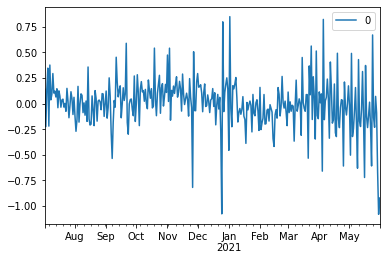

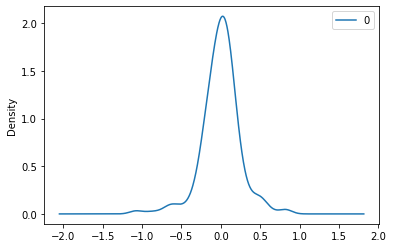

                0
count  334.000000
mean     0.000380
std      0.247720
min     -1.082662
25%     -0.118850
50%      0.009901
75%      0.122270
max      0.849761
predicted=0.595467, expected=0.558563
predicted=0.533502, expected=0.471370
predicted=0.375831, expected=0.274904
predicted=0.216034, expected=-0.156914
predicted=0.031675, expected=-0.427952
predicted=-0.095054, expected=-0.218257
predicted=-0.005806, expected=-0.047184
predicted=0.074195, expected=-0.052008
predicted=-0.016796, expected=0.134085
predicted=-0.075534, expected=-0.014668
predicted=-0.177517, expected=-0.351172
predicted=-0.297429, expected=-0.377255
predicted=-0.250148, expected=-0.002863
predicted=0.019493, expected=0.047047
predicted=0.135924, expected=0.100567
predicted=0.089946, expected=0.097608
predicted=-0.038010, expected=-0.168554
predicted=-0.234194, expected=-0.508537
predicted=-0.402119, expected=-0.326751
predicted=-0.274567, expected=-0.352578
predicted=-0.153283, expected=-0.110821
predicted=-0.0

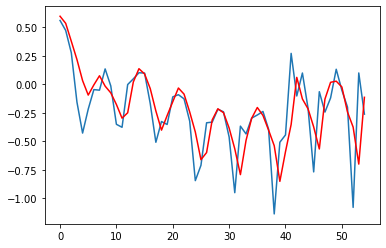

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame

# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (225 training observations and 55 testing observations)
train, test = X[:225], X[225:280] 
history = [x for x in train]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
# grid search ARIMA parameters for the whole dataset (with 280 training observations and 55 testing observations)
import warnings
import pandas as pd
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
  X = X.astype('float64')
  # prepare training dataset
  train, test = X[:280], X[280:] 
  history = [x for x in train]

  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load dataset
idx = pd.date_range("2020-07-01", periods=335)
series.index = idx.to_period()
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.377
ARIMA(0, 0, 1) RMSE=0.858
ARIMA(0, 0, 2) RMSE=0.657
ARIMA(0, 0, 3) RMSE=0.613
ARIMA(0, 1, 0) RMSE=0.452
ARIMA(0, 1, 1) RMSE=0.472
ARIMA(0, 1, 2) RMSE=0.451
ARIMA(0, 1, 3) RMSE=0.449
ARIMA(0, 2, 0) RMSE=0.668
ARIMA(0, 2, 1) RMSE=0.450
ARIMA(1, 0, 0) RMSE=0.459
ARIMA(1, 0, 1) RMSE=0.477
ARIMA(1, 0, 2) RMSE=0.456
ARIMA(1, 0, 3) RMSE=0.454
ARIMA(1, 1, 0) RMSE=0.458
ARIMA(1, 1, 1) RMSE=0.451
ARIMA(1, 1, 2) RMSE=0.450
ARIMA(1, 1, 3) RMSE=0.449
ARIMA(1, 2, 0) RMSE=0.588
ARIMA(2, 0, 0) RMSE=0.465
ARIMA(2, 0, 1) RMSE=0.456
ARIMA(2, 0, 2) RMSE=0.455
ARIMA(2, 0, 3) RMSE=0.458
ARIMA(2, 1, 0) RMSE=0.457
ARIMA(2, 1, 1) RMSE=0.449
ARIMA(2, 1, 2) RMSE=0.420
ARIMA(2, 1, 3) RMSE=0.373
ARIMA(2, 2, 0) RMSE=0.538
Best ARIMA(2, 1, 3) RMSE=0.373


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -18.917
Method:                       css-mle   S.D. of innovations              0.246
Date:                Sat, 17 Jul 2021   AIC                             51.834
Time:                        03:26:36   BIC                             78.512
Sample:                    07-02-2020   HQIC                            62.471
                         - 05-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -29.659      0.000      -0.008      -0.007
ar.L1.D.y      1.2458      0.003    413.260      0.000       1.240       1.252
ar.L2.D.y     -1.0000        nan        nan        n

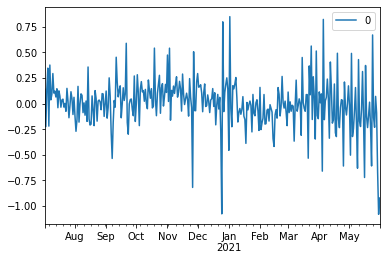

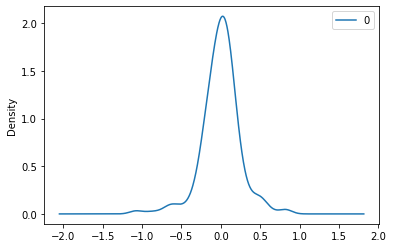

                0
count  334.000000
mean     0.000380
std      0.247720
min     -1.082662
25%     -0.118850
50%      0.009901
75%      0.122270
max      0.849761
predicted=0.014321, expected=0.052420
predicted=0.087689, expected=0.145445
predicted=-0.016444, expected=0.196595
predicted=-0.133761, expected=-0.121985
predicted=-0.279743, expected=-0.658446
predicted=-0.424217, expected=-0.048537
predicted=-0.043734, expected=0.109351
predicted=0.237978, expected=0.059932
predicted=0.205559, expected=0.038293
predicted=-0.010748, expected=0.148714
predicted=-0.151555, expected=-0.476698
predicted=-0.430926, expected=-0.806701
predicted=-0.537478, expected=-0.090791
predicted=-0.101226, expected=-0.255536
predicted=0.025675, expected=-0.209799
predicted=-0.051491, expected=-0.108902
predicted=-0.230625, expected=-0.220326
predicted=-0.442221, expected=-0.449626
predicted=-0.561392, expected=-1.212289
predicted=-0.779900, expected=-0.624808
predicted=-0.477399, expected=-0.525631
predicted=

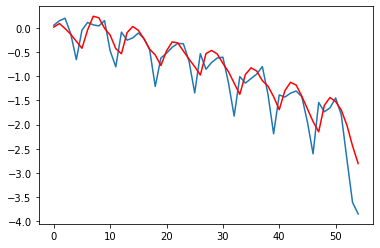

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
# fit model
series = series.astype('float64')
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import itertools
from itertools import chain
X = series.values.astype('float64')

# prepare training dataset (280 training observations and 55 testing observations)
train, test = X[:280], X[280:] 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('MAE score: %.3f' % mae)
r2 = r2_score(test, predictions)
print('R2 score: %.3f' % r2)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


                   y
2020-07-01 -0.497041
2020-07-02 -0.364667
2020-07-03 -0.510598
2020-07-04 -0.684904
2020-07-05 -0.528244
...              ...
2021-05-27 -1.451009
2021-05-28 -1.795972
2021-05-29 -2.712560
2021-05-30 -3.607013
2021-05-31 -3.846692

[335 rows x 1 columns]


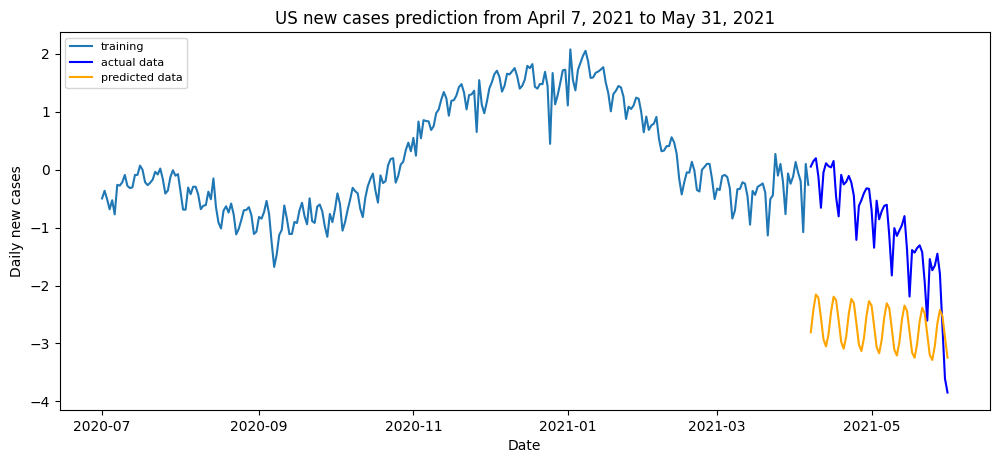

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf 
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox

print(series)
train1 = series.iloc[0:280]
idx1 = pd.date_range("2020-07-01", periods=280)
train1.index = idx1

test1 = series.iloc[280:]
idx2 = pd.date_range("2021-04-07", periods=55)
test1.index = idx2


# Forecast
fc, se, conf = model_fit.forecast(55, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test1.index)
lower_series = pd.Series(conf[:, 0], index=test1.index)
upper_series = pd.Series(conf[:, 1], index=test1.index)
fig = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, color = 'blue', label='actual data')
plt.plot(fc_series, color = 'orange',label='predicted data')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('US new cases prediction from April 7, 2021 to May 31, 2021')
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.legend(loc='upper left', fontsize=8)
plt.show()
